In [59]:
# Team 4 
# Auction Verification
# Reed Bevins, Ryan Thomas, Garland Lau


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
#########################################################
df = pd.read_csv("data.csv")
df.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


In [61]:
# (a) The mean, median, and standard deviation
# product
product = df["property.product"]
x = np.mean(product)
y = np.median(product)
z = np.std(product)
print("Product")
print("Mean: " + str(x))
print("Median: " + str(y))
print("Std Dev: " + str(z))

#price
price = df["property.price"]
x = np.mean(price)
y = np.median(price)
z = np.std(price)
print("\nPrice")
print("Mean: " + str(x))
print("Median: " + str(y))
print("Std Dev: " + str(z))

v_true = df[df["verification.result"] == True]
x = np.mean(v_true["verification.time"]) 
y = np.median(v_true["verification.time"])
z = np.std(v_true["verification.time"])
print("\nRuntime of Verification is True")
print("Mean: " + str(x))
print("Median: " + str(y))
print("Std Dev: " + str(z))

v_false = df[df["verification.result"] == False]
x = np.mean(v_false["verification.time"]) 
y = np.median(v_false["verification.time"])
z = np.std(v_false["verification.time"])
print("\nRuntime of Verification is False")
print("Mean: " + str(x))
print("Median: " + str(y))
print("Std Dev: " + str(z))

Product
Mean: 3.2520802741067056
Median: 3.0
Std Dev: 1.80378384296633

Price
Mean: 71.47332354380812
Median: 70.0
Std Dev: 8.046770287347357

Runtime of Verification is True
Mean: 1060.1816468524053
Median: 306.6041666666667
Std Dev: 2096.310871639076

Runtime of Verification is False
Mean: 8260.308912966933
Median: 1517.904761904762
Std Dev: 10776.343410306437


Text(0.5, 1.0, 'False Verification Runtime Summary')

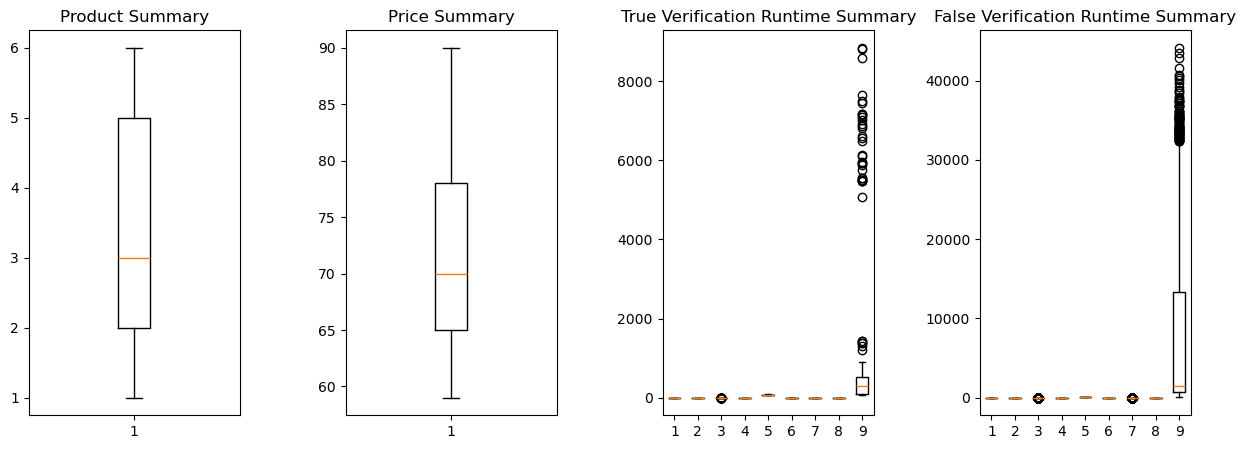

In [62]:
# (b) Draw boxplots of attributes in one frame.
fig, plt_table = plt.subplots(1, 4, figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

plt_table[0].boxplot(product)
plt_table[0].set_title('Product Summary') 
plt_table[1].boxplot(price)
plt_table[1].set_title('Price Summary')
plt_table[2].boxplot(v_true)
plt_table[2].set_title('True Verification Runtime Summary')
plt_table[3].boxplot(v_false)
plt_table[3].set_title('False Verification Runtime Summary')

C:\Users\garla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\garla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\garla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


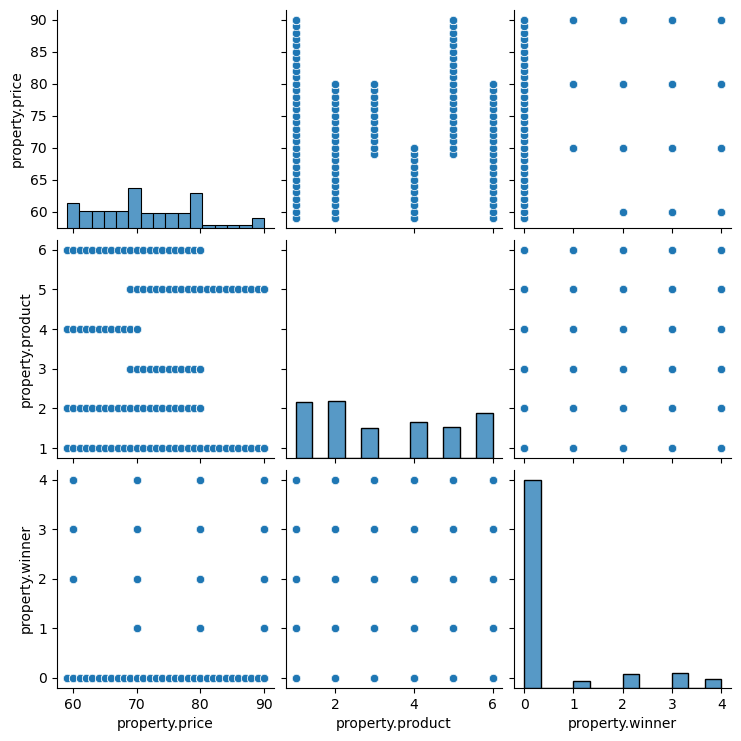

C:\Users\garla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\garla\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\garla\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\garla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True

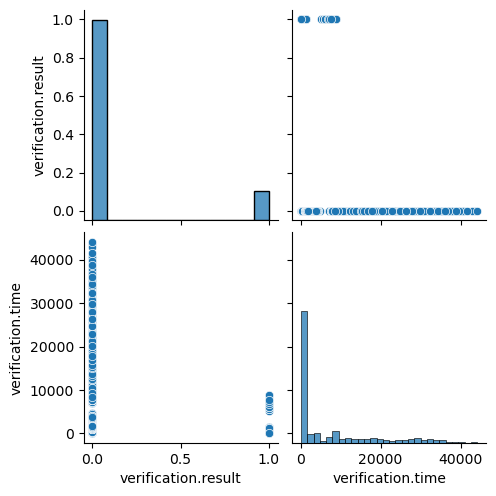

In [63]:
# (c) Draw pairplots

# product details
item_detail = df[["property.price", "property.product", "property.winner"]]
sns.pairplot(item_detail)
# plt.title("Product detail")
plt.show()

# verification details
verification_detail = df[["verification.result", "verification.time" ]]
sns.pairplot(verification_detail)
# plt.title("Verification detail")
plt.show()


Pearsons correlation: 0.078


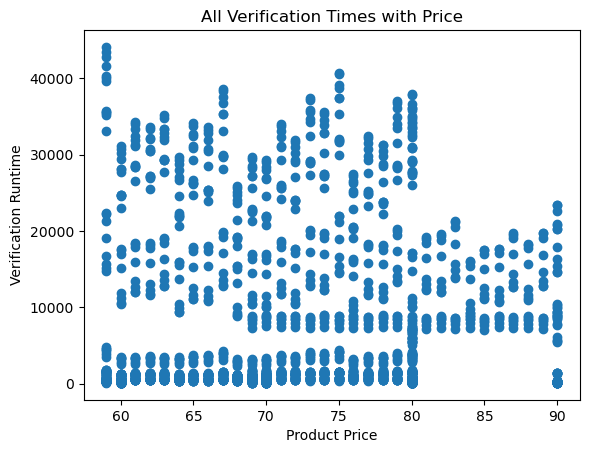

In [79]:
# (d) Calculate the correlation if the scatter plot shows a correlation among variables. 
from scipy.stats import pearsonr
plt.title("All Verification Times with Price")
plt.xlabel("Product Price")
plt.ylabel("Verification Runtime")
runtime = df["verification.time"]
plt.scatter(price, runtime)
corr, _ = pearsonr(price, runtime)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.301


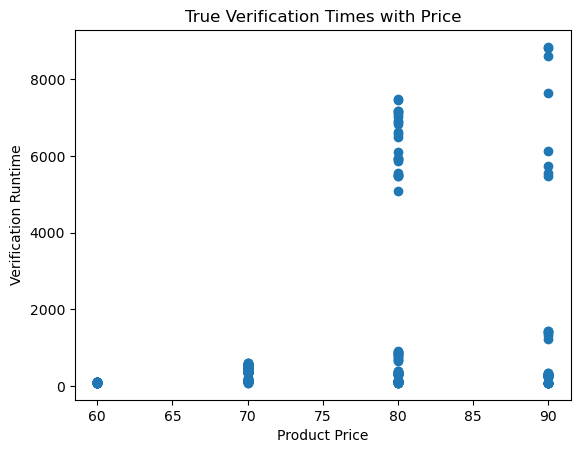

In [81]:
# (d) Calculate the correlation if the scatter plot shows a correlation among variables. 
plt.title("True Verification Times with Price")
plt.xlabel("Product Price")
plt.ylabel("Verification Runtime")
true_runtime = v_true["verification.time"]
true_price = v_true["property.price"]
plt.scatter(true_price, true_runtime)
corr, _ = pearsonr(true_price, true_runtime)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.137


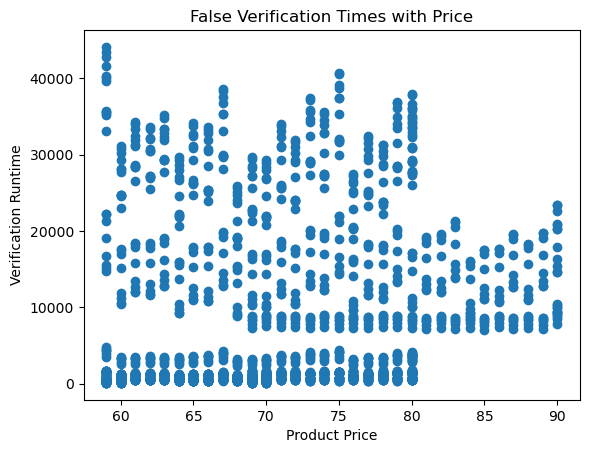

In [80]:
# (d) Calculate the correlation if the scatter plot shows a correlation among variables. 
plt.title("False Verification Times with Price")
plt.xlabel("Product Price")
plt.ylabel("Verification Runtime")
false_runtime = v_false["verification.time"]
false_price = v_false["property.price"]
plt.scatter(false_price, false_runtime)
corr, _ = pearsonr(false_price, false_runtime)
print('Pearsons correlation: %.3f' % corr)